In [1]:
# select models
filt = c3.Filter().eq("technique.id", "BQ3L")
models = c3.GaussianProcessRegressionPipe.fetch({"limit": 32, "include": "id", "filter": filt}).objs

model_ids = []
for model in models:
    model_ids.append(model.id)

In [31]:
kernelLen = 18
GPR_kernel = c3.SklearnGPRKernelMatern(lengthScale=[1.0]*kernelLen, nu=0.5, coefficient=1.0).build().kernel.upsert()

GPR_technique = c3.GaussianProcessRegressionTechnique(
                    randomState=42,
                    kernel = GPR_kernel
).upsert()

GPR_dataspec = c3.GPRDataSourceSpec(
    featuresType = c3.TypeRef(
        typeName="StagedFeatures"
    ),
    targetType=c3.TypeRef(
        typeName="StagedTargets"
    )
).upsert()

GPR_pipe = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique,
    dataSourceSpec=GPR_dataspec
)

In [32]:
GPR_pipe.trainWithStagedAOD(model_ids)

Json request to /api/1/dev/tc02d/GaussianProcessRegressionPipe?action=trainWithStagedAOD failed with response ServerResponse(statusCode=504, content='<html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n<hr><center>Microsoft-Azure-Application-Gateway/v2</center>\r\n</body>\r\n</html>\r\n', headers={'Server': 'Microsoft-Azure-Application-Gateway/v2', 'Date': 'Wed, 05 Oct 2022 20:05:57 GMT', 'Content-Type': 'text/html', 'Content-Length': '193', 'Connection': 'keep-alive'})


RuntimeError: Json request to /api/1/dev/tc02d/GaussianProcessRegressionPipe?action=trainWithStagedAOD failed with response ServerResponse(statusCode=504, content='<html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n<hr><center>Microsoft-Azure-Application-Gateway/v2</center>\r\n</body>\r\n</html>\r\n', headers={'Server': 'Microsoft-Azure-Application-Gateway/v2', 'Date': 'Wed, 05 Oct 2022 20:05:57 GMT', 'Content-Type': 'text/html', 'Content-Length': '193', 'Connection': 'keep-alive'})

In [25]:
n_models = [1,2,4,8,16]
times = [16.0, 47.6, 155.2, 567, 1525]

In [26]:
import matplotlib.pyplot as plt

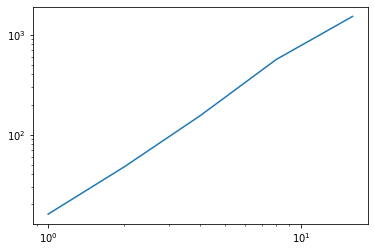

In [29]:
plt.plot(n_models, times)
plt.xscale('log')
plt.yscale('log')